In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
from collections import Counter
DATA_PATH = "../data/training_data.csv"

In [5]:
df = pd.read_csv(DATA_PATH,sep=";",names=["review","ratings"])
df.head(3)

,review,ratings
0,ร้านอาหารใหญ่มากกกกกกก \nเลี้ยวเข้ามาเจอห้องน้...,3
1,อาหารที่นี่เป็นอาหารจีนแคะที่หากินยากในบ้านเรา...,4
2,ปอเปี๊ยะสด ทุกวันนี้รู้สึกว่าหากินยาก (ร้านที่...,3


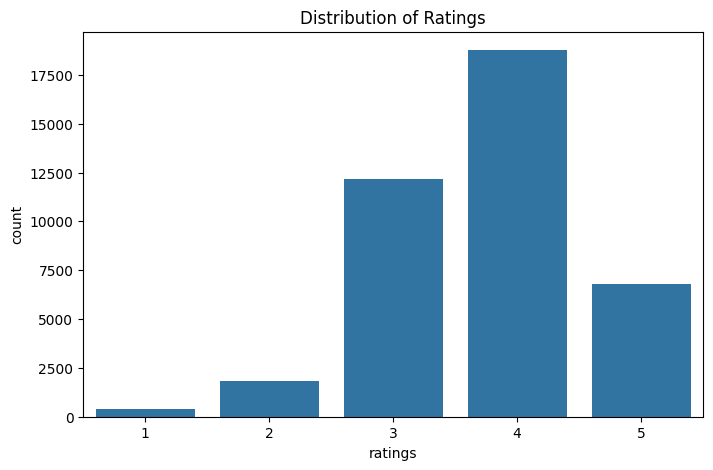

In [7]:
def review_distribution_analysis(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(x='ratings', data=df)
    plt.title('Distribution of Ratings')
    plt.show()
review_distribution_analysis(df)

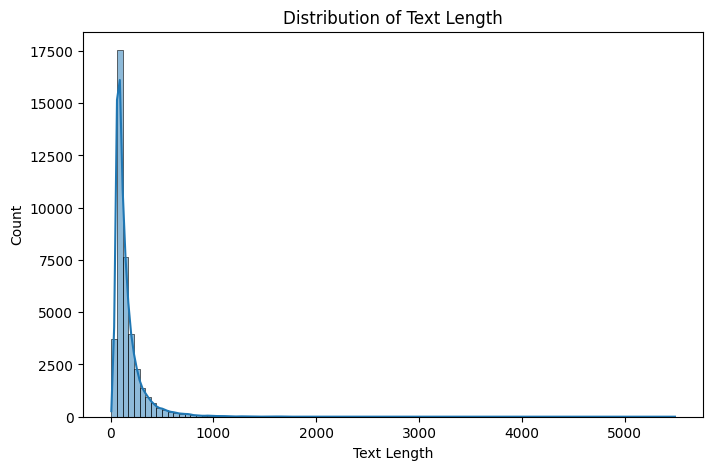

In [11]:
def text_length_distribution_analysis(df):
    df['Text Length'] = df['review'].apply(lambda x: len(word_tokenize(x, engine='newmm')))
    
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Text Length'], bins=100, kde=True)
    plt.title('Distribution of Text Length')
    plt.xlabel('Text Length')
    plt.show()
text_length_distribution_analysis(df)

In [13]:
def language_challenges_analysis(df):
    thai_reviews = df[df['review'].apply(lambda x: any(characters in x for characters in 'ก-ฮ'))]
    non_thai_reviews = df[df['review'].apply(lambda x: not any(characters in x for characters in 'ก-ฮ'))]
    
    print(f"Number of Thai Reviews: {len(thai_reviews)}")
    print(f"Number of Non-Thai Reviews: {len(non_thai_reviews)}")
language_challenges_analysis(df)

Number of Thai Reviews: 39834
Number of Non-Thai Reviews: 166


In [14]:
def missing_values_analysis(df):
    missing_values = df.isnull().sum()
    print("Missing Values:\n", missing_values)
missing_values_analysis(df)

Missing Values:
 review         0
ratings        0
Text Length    0
dtype: int64


/Users/ankitkumar/Desktop/thai-language-review-classification/review-classification-env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3610 (\N{THAI CHARACTER BO BAIMAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ankitkumar/Desktop/thai-language-review-classification/review-classification-env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ankitkumar/Desktop/thai-language-review-classification/review-classification-env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ankitkumar/Desktop/thai-language-review-classification/review-classification-env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3594 (\N{THAI CHAR

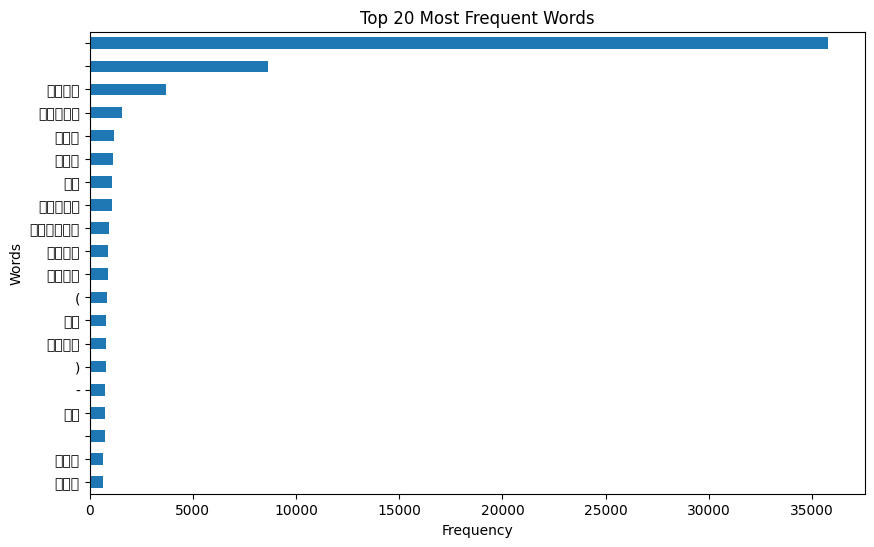

In [16]:
def word_frequency_analysis(df):
    stopwords = thai_stopwords()
    
    all_words = ' '.join(df['review'][1:1000]).lower()
    words = [word for word in word_tokenize(all_words, engine='newmm') if word not in stopwords]
    
    word_freq = pd.Series(words).value_counts().head(20)
    
    plt.figure(figsize=(10, 6))
    word_freq.sort_values().plot(kind='barh')
    plt.title('Top 20 Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()
word_frequency_analysis(df)